In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
#그래프의 크기를 세팅
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [3]:
#타이타닉 데이터를 불러온다. 
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


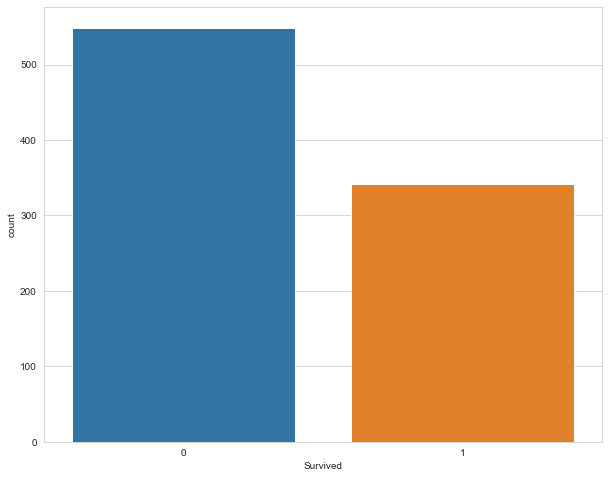

In [10]:
# 생존여부 'Survived' 분포를 알고자 함
sb.countplot(x = 'Survived', data = titanic)
plt.show()

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic_data = titanic.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


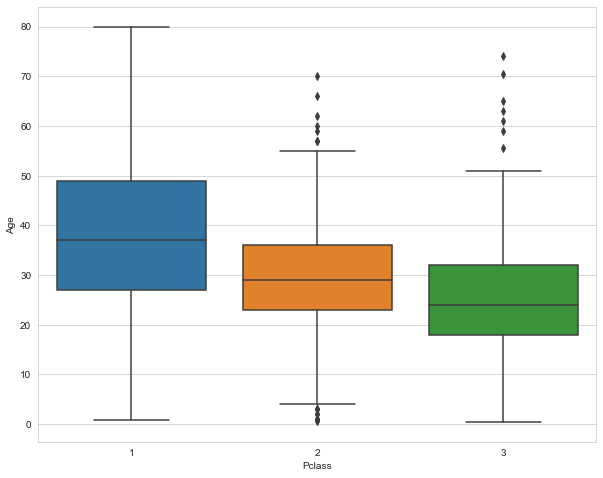

In [16]:
# Pclass(여행객 선박의 등급)에 따른 나이 분포를 boxplot으로 표현
sb.boxplot(x = 'Pclass', y = 'Age', data = titanic_data)
plt.show()

# 등급이 낮을 수록 연령대가 낮아지는 거 확인

In [17]:
titanic.Age.median()

28.0

In [18]:
titanic[titanic['Pclass']==1].Age.median()

37.0

In [19]:
titanic[titanic['Pclass']==2].Age.median()

29.0

In [37]:
titanic[titanic['Pclass']==3].Age.median()

24.0

In [39]:
# age가 null 값 결측치 채우기 위해서 Pclass에 따른 나이값으로 세팅하고 싶다.

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [40]:
# 나이가 null 인 경우, 결측값 채워야 겠다.
titanic_data[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [41]:
titanic_data[['Age','Pclass']].apply(age_approx, axis = 1)
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [42]:
titanic_data.dropna(inplace = True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
# 범주형 변수 Sex, Embarked 데이터 >> 연속형 데이터로 변환(숫자)
# get_dummies >> 1,0 반환
pd.get_dummies(titanic_data.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [45]:
pd.get_dummies(titanic_data.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [47]:
# embarked 범주형 변수를 숫자로 변환 >> embarked_location 변환
gender = pd.get_dummies(titanic_data.Sex, drop_first = True)

In [48]:
gender = pd.get_dummies(titanic_data.Sex, drop_first = True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [50]:
embark_location = pd.get_dummies(titanic_data.Embarked, drop_first = True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [51]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
titanic_data.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [55]:
titanic_dmy = pd.concat([titanic_data, gender, embark_location], axis = 1)
titanic_dmy

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


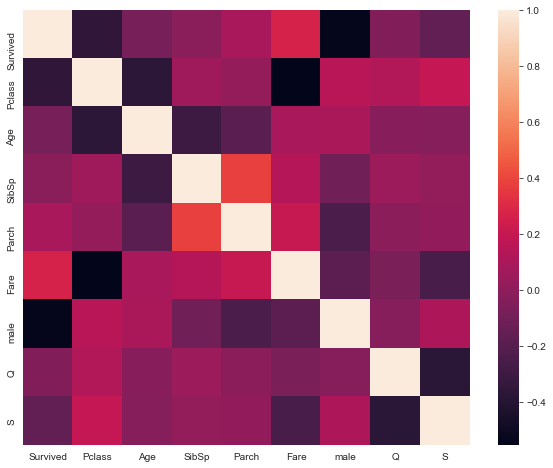

In [59]:
# 독립변수 간의 상관관계 그래프 그려보기 (히트맵)
sb.heatmap(titanic_dmy.corr())
plt.show()

In [60]:
# 상관관계가 높은 'Fare', 'Pclass' 버림
titanic_dmy.drop(['Fare', 'Pclass'], axis = 1, inplace = True)
titanic_dmy.head()

,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


In [61]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Age       712 non-null    float64
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   male      712 non-null    uint8  
 5   Q         712 non-null    uint8  
 6   S         712 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 29.9 KB


In [63]:
# 'Survived' >> target(y)로 정함. 나머지는 독립변수 data(x) 정의
x = titanic_dmy.iloc[:,1:].values
y = titanic_dmy.iloc[:,0].values # Survived

In [64]:
x, y

(array([[22.,  1.,  0.,  1.,  0.,  1.],
        [38.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  1.],
        ...,
        [19.,  0.,  0.,  0.,  0.,  1.],
        [26.,  0.,  0.,  1.,  0.,  0.],
        [32.,  0.,  0.,  1.,  1.,  0.]]),
 array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
     

## 모델링

In [65]:
# 훈련용 데이터, 시험용 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [66]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train) # 훈련

LogisticRegression()

In [68]:
y_pred = logreg.predict(x_test) # 예측

In [69]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[103,  19],
       [ 34,  58]], dtype=int64)

In [70]:
# 정확도, recall, f-1 score등등
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       122
           1       0.75      0.63      0.69        92

    accuracy                           0.75       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214

